In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

max_features = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


   ## RNN

In [2]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
hist_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

loss, accuracy = model_rnn.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Epoch 1/10
196/196 [==============================] - 20s 91ms/step - loss: 0.5732 - accuracy: 0.6894 - val_loss: 0.4301 - val_accuracy: 0.8121
Epoch 2/10
196/196 [==============================] - 18s 93ms/step - loss: 0.3436 - accuracy: 0.8554 - val_loss: 0.3624 - val_accuracy: 0.8417
Epoch 3/10
196/196 [==============================] - 15s 76ms/step - loss: 0.2450 - accuracy: 0.9044 - val_loss: 0.3635 - val_accuracy: 0.8500
Epoch 4/10
196/196 [==============================] - 15s 74ms/step - loss: 0.1846 - accuracy: 0.9324 - val_loss: 0.4321 - val_accuracy: 0.8127
Epoch 5/10
196/196 [==============================] - 15s 76ms/step - loss: 0.1247 - accuracy: 0.9573 - val_loss: 0.4316 - val_accuracy: 0.8314
Epoch 6/10
196/196 [==============================] - 15s 75ms/step - loss: 0.0664 - accuracy: 0.9808 - val_loss: 0.5198 - val_accuracy: 0.8359
Epoch 7/10
196/196 [==============================] - 17s 88ms/step - loss: 0.0530 - accuracy: 0.9845 - val_loss: 0.5618 - val_accuracy:

## LSTM

In [4]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
hist_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

loss, accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Epoch 1/10
196/196 [==============================] - 39s 187ms/step - loss: 0.4505 - accuracy: 0.7846 - val_loss: 0.3088 - val_accuracy: 0.8701
Epoch 2/10
196/196 [==============================] - 37s 189ms/step - loss: 0.2334 - accuracy: 0.9113 - val_loss: 0.2989 - val_accuracy: 0.8742
Epoch 3/10
196/196 [==============================] - 36s 183ms/step - loss: 0.1783 - accuracy: 0.9362 - val_loss: 0.3354 - val_accuracy: 0.8648
Epoch 4/10
196/196 [==============================] - 35s 180ms/step - loss: 0.1424 - accuracy: 0.9505 - val_loss: 0.3750 - val_accuracy: 0.8614
Epoch 5/10
196/196 [==============================] - 32s 162ms/step - loss: 0.1124 - accuracy: 0.9628 - val_loss: 0.3852 - val_accuracy: 0.8612
Epoch 6/10
196/196 [==============================] - 35s 181ms/step - loss: 0.0898 - accuracy: 0.9715 - val_loss: 0.4149 - val_accuracy: 0.8563
Epoch 7/10
196/196 [==============================] - 34s 173ms/step - loss: 0.0819 - accuracy: 0.9740 - val_loss: 0.4736 - val_ac

## Bidirectional

In [6]:
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Bidirectional(LSTM(32)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_bidirectional.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
hist_bi = model_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

loss, accuracy = model_bidirectional.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Epoch 1/10
196/196 [==============================] - 60s 281ms/step - loss: 0.4796 - accuracy: 0.7646 - val_loss: 0.3146 - val_accuracy: 0.8692
Epoch 2/10
196/196 [==============================] - 55s 283ms/step - loss: 0.2505 - accuracy: 0.9036 - val_loss: 0.3117 - val_accuracy: 0.8734
Epoch 3/10
196/196 [==============================] - 64s 329ms/step - loss: 0.1848 - accuracy: 0.9333 - val_loss: 0.3133 - val_accuracy: 0.8730
Epoch 4/10
196/196 [==============================] - 66s 336ms/step - loss: 0.1482 - accuracy: 0.9474 - val_loss: 0.3557 - val_accuracy: 0.8650
Epoch 5/10
196/196 [==============================] - 67s 344ms/step - loss: 0.1165 - accuracy: 0.9608 - val_loss: 0.3920 - val_accuracy: 0.8631
Epoch 6/10
196/196 [==============================] - 63s 320ms/step - loss: 0.1053 - accuracy: 0.9656 - val_loss: 0.4224 - val_accuracy: 0.8588
Epoch 7/10
196/196 [==============================] - 54s 277ms/step - loss: 0.0799 - accuracy: 0.9748 - val_loss: 0.5076 - val_ac

## Deep

In [8]:
model_deep = Sequential()
model_deep.add(Embedding(max_features, 32))
model_deep.add(LSTM(32, return_sequences=True))
model_deep.add(LSTM(32))
model_deep.add(Dense(1, activation='sigmoid'))

model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_deep.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
hist_deep = model_deep.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

loss, accuracy = model_deep.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Epoch 1/10
196/196 [==============================] - 76s 359ms/step - loss: 0.4232 - accuracy: 0.7883 - val_loss: 0.3797 - val_accuracy: 0.8327
Epoch 2/10
196/196 [==============================] - 71s 362ms/step - loss: 0.2391 - accuracy: 0.9089 - val_loss: 0.3271 - val_accuracy: 0.8602
Epoch 3/10
196/196 [==============================] - 70s 359ms/step - loss: 0.1788 - accuracy: 0.9353 - val_loss: 0.3387 - val_accuracy: 0.8558
Epoch 4/10
196/196 [==============================] - 72s 366ms/step - loss: 0.1460 - accuracy: 0.9495 - val_loss: 0.4097 - val_accuracy: 0.8356
Epoch 5/10
196/196 [==============================] - 71s 361ms/step - loss: 0.1147 - accuracy: 0.9618 - val_loss: 0.4219 - val_accuracy: 0.8565
Epoch 6/10
196/196 [==============================] - 72s 370ms/step - loss: 0.0928 - accuracy: 0.9709 - val_loss: 0.4457 - val_accuracy: 0.8500
Epoch 7/10
196/196 [==============================] - 71s 363ms/step - loss: 0.0721 - accuracy: 0.9774 - val_loss: 0.4523 - val_ac

In [28]:
def display_plot(hist_rnn, hist_lstm, hist_bi, hist_deep, field_name):
    acc_df = pd.DataFrame({'rnn': hist_rnn.history[field_name],'lstm': hist_lstm.history[field_name], 'bi': hist_bi.history[field_name], 'deep':hist_deep.history[field_name]})

    acc_df.plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


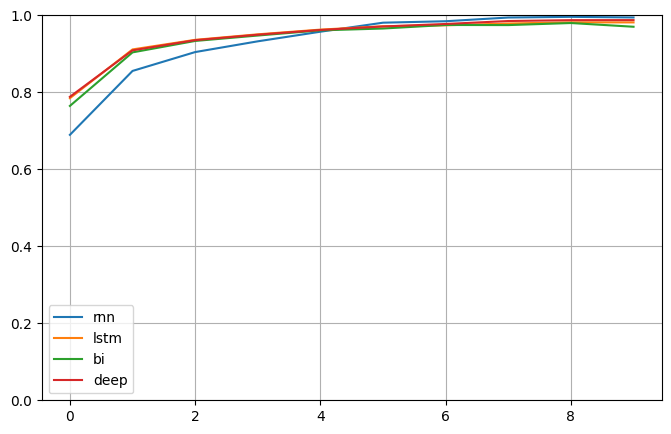

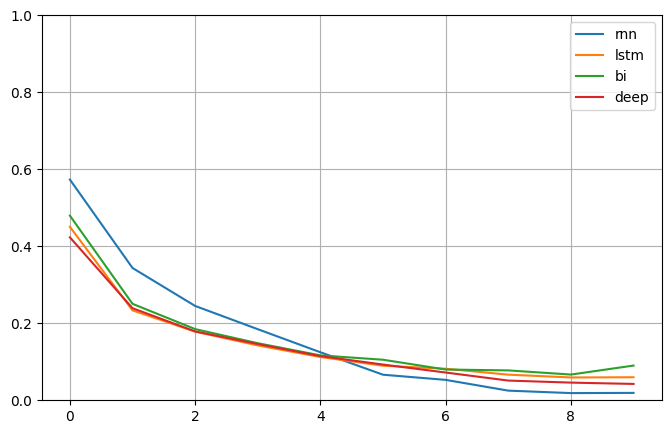

In [30]:
display_plot(hist_rnn, hist_lstm, hist_bi, hist_deep, 'accuracy')
display_plot(hist_rnn, hist_lstm, hist_bi, hist_deep, 'loss')

Кожна з моделей має дуже схожі значення точності на тестовому прикладі.
LSTM, Bidirectional та Deep швидше до 5-ої епохи мають кращу точніть ніж RNN і вже потім вони наближаються ща точністю.